<a href="https://colab.research.google.com/github/virbickt/default-risk-prediction/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature selection

We are now in a position to try and address the aditional requirements for the project, namely the simplicity of the model and the time it takes the model to produce predictions. While we've seen that LGBMClassifier does best in terms of speed, we have also seen that there are a lot of features which the model found of little if any importance which means that that the number of features can be further reduced, thus reducing the complexity of the model. 

### BorutaPy

In [ ]:
# load the all inclusive set of data
INCLUSIVE_train = pd.read_csv("/content/drive/MyDrive/341/ALL_INCLUDED_train.csv")
INCLUSIVE_test = pd.read_csv("/content/drive/MyDrive/341/ALL_INCLUDED_test.csv")

In [ ]:
forest = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
forest.fit(INCLUSIVE_train, WORKING_y)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1)

In [ ]:
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# # find all relevant features
feat_selector.fit(INCLUSIVE_train.values, WORKING_y)

# check selected features
feat_selector.support_

# # check ranking of features
feat_selector.ranking_

# # call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(INCLUSIVE_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	525
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	161
Tentative: 	137
Rejected: 	227
Iteration: 	9 / 100
Confirmed: 	161
Tentative: 	137
Rejected: 	227
Iteration: 	10 / 100
Confirmed: 	161
Tentative: 	137
Rejected: 	227
Iteration: 	11 / 100
Confirmed: 	161
Tentative: 	137
Rejected: 	227
Iteration: 	12 / 100
Confirmed: 	162
Tentative: 	109
Rejected: 	254
Iteration: 	13 / 100
Confirmed: 	162
Tentative: 	109
Rejected: 	254
Iteration: 	14 / 100
Confirmed: 	162
Tentative: 	109
Rejected: 	254
Iteration: 	15 / 100
Confirmed: 	162
Tentative: 	109
Rejected: 	254
Iteration: 	16 / 

In [ ]:
# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(INCLUSIVE_train.columns, 
                         feat_selector.ranking_, 
                         feat_selector.support_))

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))

feature_ranks = pd.DataFrame({"feature": INCLUSIVE_train.columns, "rank": feat_selector.ranking_, "keep?": feat_selector.support_})

Feature: Unnamed: 0                Rank: 15,  Keep: False
Feature: CNT_CHILDREN              Rank: 129,  Keep: False
Feature: AMT_INCOME_TOTAL          Rank: 51,  Keep: False
Feature: AMT_CREDIT_x              Rank: 43,  Keep: False
Feature: AMT_ANNUITY_x             Rank: 26,  Keep: False
Feature: AMT_GOODS_PRICE_x         Rank: 49,  Keep: False
Feature: REGION_POPULATION_RELATIVE Rank: 46,  Keep: False
Feature: DAYS_BIRTH                Rank: 1,  Keep: True
Feature: DAYS_EMPLOYED             Rank: 38,  Keep: False
Feature: DAYS_REGISTRATION         Rank: 2,  Keep: False
Feature: DAYS_ID_PUBLISH           Rank: 4,  Keep: False
Feature: OWN_CAR_AGE               Rank: 87,  Keep: False
Feature: FLAG_MOBIL                Rank: 513,  Keep: False
Feature: FLAG_EMP_PHONE            Rank: 205,  Keep: False
Feature: FLAG_WORK_PHONE           Rank: 159,  Keep: False
Feature: FLAG_CONT_MOBILE          Rank: 402,  Keep: False
Feature: FLAG_PHONE                Rank: 177,  Keep: False
Feature: FL

In [ ]:
list_most_important = ['AMT_INCOME_TOTAL',
                       'AMT_CREDIT_x',
                       'AMT_ANNUITY_x',
                       'AMT_GOODS_PRICE_x',
                       'REGION_POPULATION_RELATIVE',
                       'DAYS_BIRTH',
                       'DAYS_EMPLOYED',
                       'DAYS_REGISTRATION',
                       'DAYS_ID_PUBLISH',
                       'OWN_CAR_AGE',
                       'FLAG_EMP_PHONE',
                       'REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY',
                       'EXT_SOURCE_1',
                       'EXT_SOURCE_2',
                       'EXT_SOURCE_3',
                       'APARTMENTS_AVG',
                       'BASEMENTAREA_AVG',
                       'YEARS_BEGINEXPLUATATION_AVG',
                       'ELEVATORS_AVG',
                       'FLOORSMAX_AVG',
                       'LIVINGAREA_AVG',
                       'APARTMENTS_MODE',
                       'YEARS_BEGINEXPLUATATION_MODE',
                       'FLOORSMAX_MODE',
                       'LIVINGAREA_MODE',
                       'APARTMENTS_MEDI',
                       'BASEMENTAREA_MEDI',
                       'YEARS_BEGINEXPLUATATION_MEDI',
                       'ELEVATORS_MEDI',
                       'FLOORSMAX_MEDI',
                       'LIVINGAREA_MEDI',
                       'DEF_30_CNT_SOCIAL_CIRCLE',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'DAYS_LAST_PHONE_CHANGE',
                       'FLAG_DOCUMENT_3',
                       'FLAG_DOCUMENT_6',
                       'AMT_ANNUITY_y',
                       'AMT_APPLICATION',
                       'AMT_CREDIT_y',
                       'AMT_DOWN_PAYMENT',
                       'AMT_GOODS_PRICE_y',
                       'HOUR_APPR_PROCESS_START_y',
                       'RATE_DOWN_PAYMENT',
                       'DAYS_DECISION',
                       'SELLERPLACE_AREA',
                       'CNT_PAYMENT',
                       'DAYS_FIRST_DRAWING',
                       'DAYS_FIRST_DUE',
                       'DAYS_LAST_DUE_1ST_VERSION',
                       'DAYS_LAST_DUE',
                       'DAYS_TERMINATION',
                       'ON_TIME',
                       'LATE',
                       'LATE_ON_TIME_DAYS_RATIO',
                       'FULL',
                       'SHORT',
                       'SHORT_ON_PAYMENT_RATIO',
                       'MONTHS_BALANCE',
                       'AMT_BALANCE',
                       'AMT_CREDIT_LIMIT_ACTUAL',
                       'AMT_DRAWINGS_ATM_CURRENT',
                       'AMT_DRAWINGS_CURRENT',
                       'AMT_DRAWINGS_POS_CURRENT',
                       'AMT_INST_MIN_REGULARITY',
                       'AMT_PAYMENT_CURRENT',
                       'AMT_PAYMENT_TOTAL_CURRENT',
                       'AMT_RECEIVABLE_PRINCIPAL',
                       'AMT_RECIVABLE',
                       'AMT_TOTAL_RECEIVABLE',
                       'CNT_DRAWINGS_ATM_CURRENT',
                       'CNT_DRAWINGS_CURRENT',
                       'CNT_DRAWINGS_POS_CURRENT',
                       'CNT_INSTALMENT_MATURE_CUM',
                       'Active',
                       'PREV_COUNTS',
                       'STAT_ACTIVE',
                       'STAT_CLOSED',
                       'CURR_1',
                       'DAYS_CREDIT',
                       'DAYS_CREDIT_ENDDATE',
                       'DAYS_ENDDATE_FACT',
                       'AMT_CREDIT_MAX_OVERDUE',
                       'AMT_CREDIT_SUM',
                       'AMT_CREDIT_SUM_DEBT',
                       'AMT_CREDIT_SUM_LIMIT',
                       'DAYS_CREDIT_UPDATE',
                       'TYPE_CONSUMER',
                       'TYPE_CREDIT_CARD',
                       'TYPE_MICRO',
                       'OWN_CAR_AGE_na',
                       'OCCUPATION_TYPE_na',
                       'EXT_SOURCE_1_na',
                       'EXT_SOURCE_3_na',
                       'APARTMENTS_AVG_na',
                       'YEARS_BEGINEXPLUATATION_AVG_na',
                       'ELEVATORS_AVG_na',
                       'ENTRANCES_AVG_na',
                       'FLOORSMAX_AVG_na',
                       'LIVINGAREA_AVG_na',
                       'APARTMENTS_MODE_na',
                       'YEARS_BEGINEXPLUATATION_MODE_na',
                       'ELEVATORS_MODE_na',
                       'ENTRANCES_MODE_na',
                       'FLOORSMAX_MODE_na',
                       'LIVINGAREA_MODE_na',
                       'NONLIVINGAREA_MODE_na',
                       'APARTMENTS_MEDI_na',
                       'ELEVATORS_MEDI_na',
                       'ENTRANCES_MEDI_na',
                       'FLOORSMAX_MEDI_na',
                       'LIVINGAREA_MEDI_na',
                       'NONLIVINGAREA_MEDI_na',
                       'TOTALAREA_MODE_na',
                       'EMERGENCYSTATE_MODE_na',
                       'AMT_REQ_CREDIT_BUREAU_HOUR_na',
                       'AMT_REQ_CREDIT_BUREAU_MON_na',
                       'AMT_REQ_CREDIT_BUREAU_WEEK_na',
                       'AMT_REQ_CREDIT_BUREAU_YEAR_na',
                       'MISSING_INFO_COUNT',
                       'CREDIT_ANNUITY_RATIO',
                       'EXT_SOURCES_PROD',
                       'EXT_SOURCES_WEIGHTED',
                       'EXT_SOURCES_MIN',
                       'EXT_SOURCES_MAX',
                       'EXT_SOURCES_MEAN',
                       'EXT_SOURCES_NANMEDIAN',
                       'EXT_SOURCES_VAR',
                       'TARGET_NEIGHBORS_500_MEAN',
                       'TARGET_NEIGHBORS_500_VAR',
                       '0',
                       '1',
                       '2',
                       '3',
                       '5',
                       '6',
                       '20',
                       '24',
                       '26',
                       '29',
                       '46',
                       '50',
                       '54',
                       '125',
                       '131',
                       '132',
                       '136',
                       '143',
                       '144',
                       'LOAN_RATE',
                       '*goods_to_loan_rate',
                       '*APPS_CREDIT_GOODS_DIFF',
                       '*APPS_ANNUITY_INCOME_RATIO',
                       '*APPS_CREDIT_INCOME_RATIO',
                       '*APPS_GOODS_INCOME_RATIO',
                       '*APPS_INCOME_BIRTH_RATIO',
                       '*APPS_CAR_BIRTH_RATIO',
                       '*APPS_CAR_EMPLOYED_RATIO',
                       '*credit_income_ratio', 
                       '*employed_birth_ratio',
                       '*ext_source_sum',
                       '*ext_source_mean'
                       ]

INCLUSIVE_train_boruta = INCLUSIVE_train[list_most_important]
INCLUSIVE_test_boruta = INCLUSIVE_test[list_most_important]

print(f"Shape of the training set: {INCLUSIVE_train_boruta.shape}")
print(f"Shape of the test set: {INCLUSIVE_test_boruta.shape}")

Shape of the training set: (307511, 164)
Shape of the test set: (48744, 164)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(INCLUSIVE_train_boruta, WORKING_y, test_size=0.25, random_state=RANDOM_STATE)

In [ ]:
training_dataset = lgb.Dataset(X_train, label=y_train)
testing_dataset = lgb.Dataset(X_test, label=y_test)

clf = lgb.train(
    params,
    training_dataset,
    valid_sets=[training_dataset, testing_dataset],
    verbose_eval=500,
)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[500]	training's auc: 0.795419	valid_1's auc: 0.775986
[1000]	training's auc: 0.815866	valid_1's auc: 0.782518
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1500]	training's auc: 0.832189	valid_1's auc: 0.78531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2000]	training's auc: 0.845547	valid_1's auc: 0.786843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

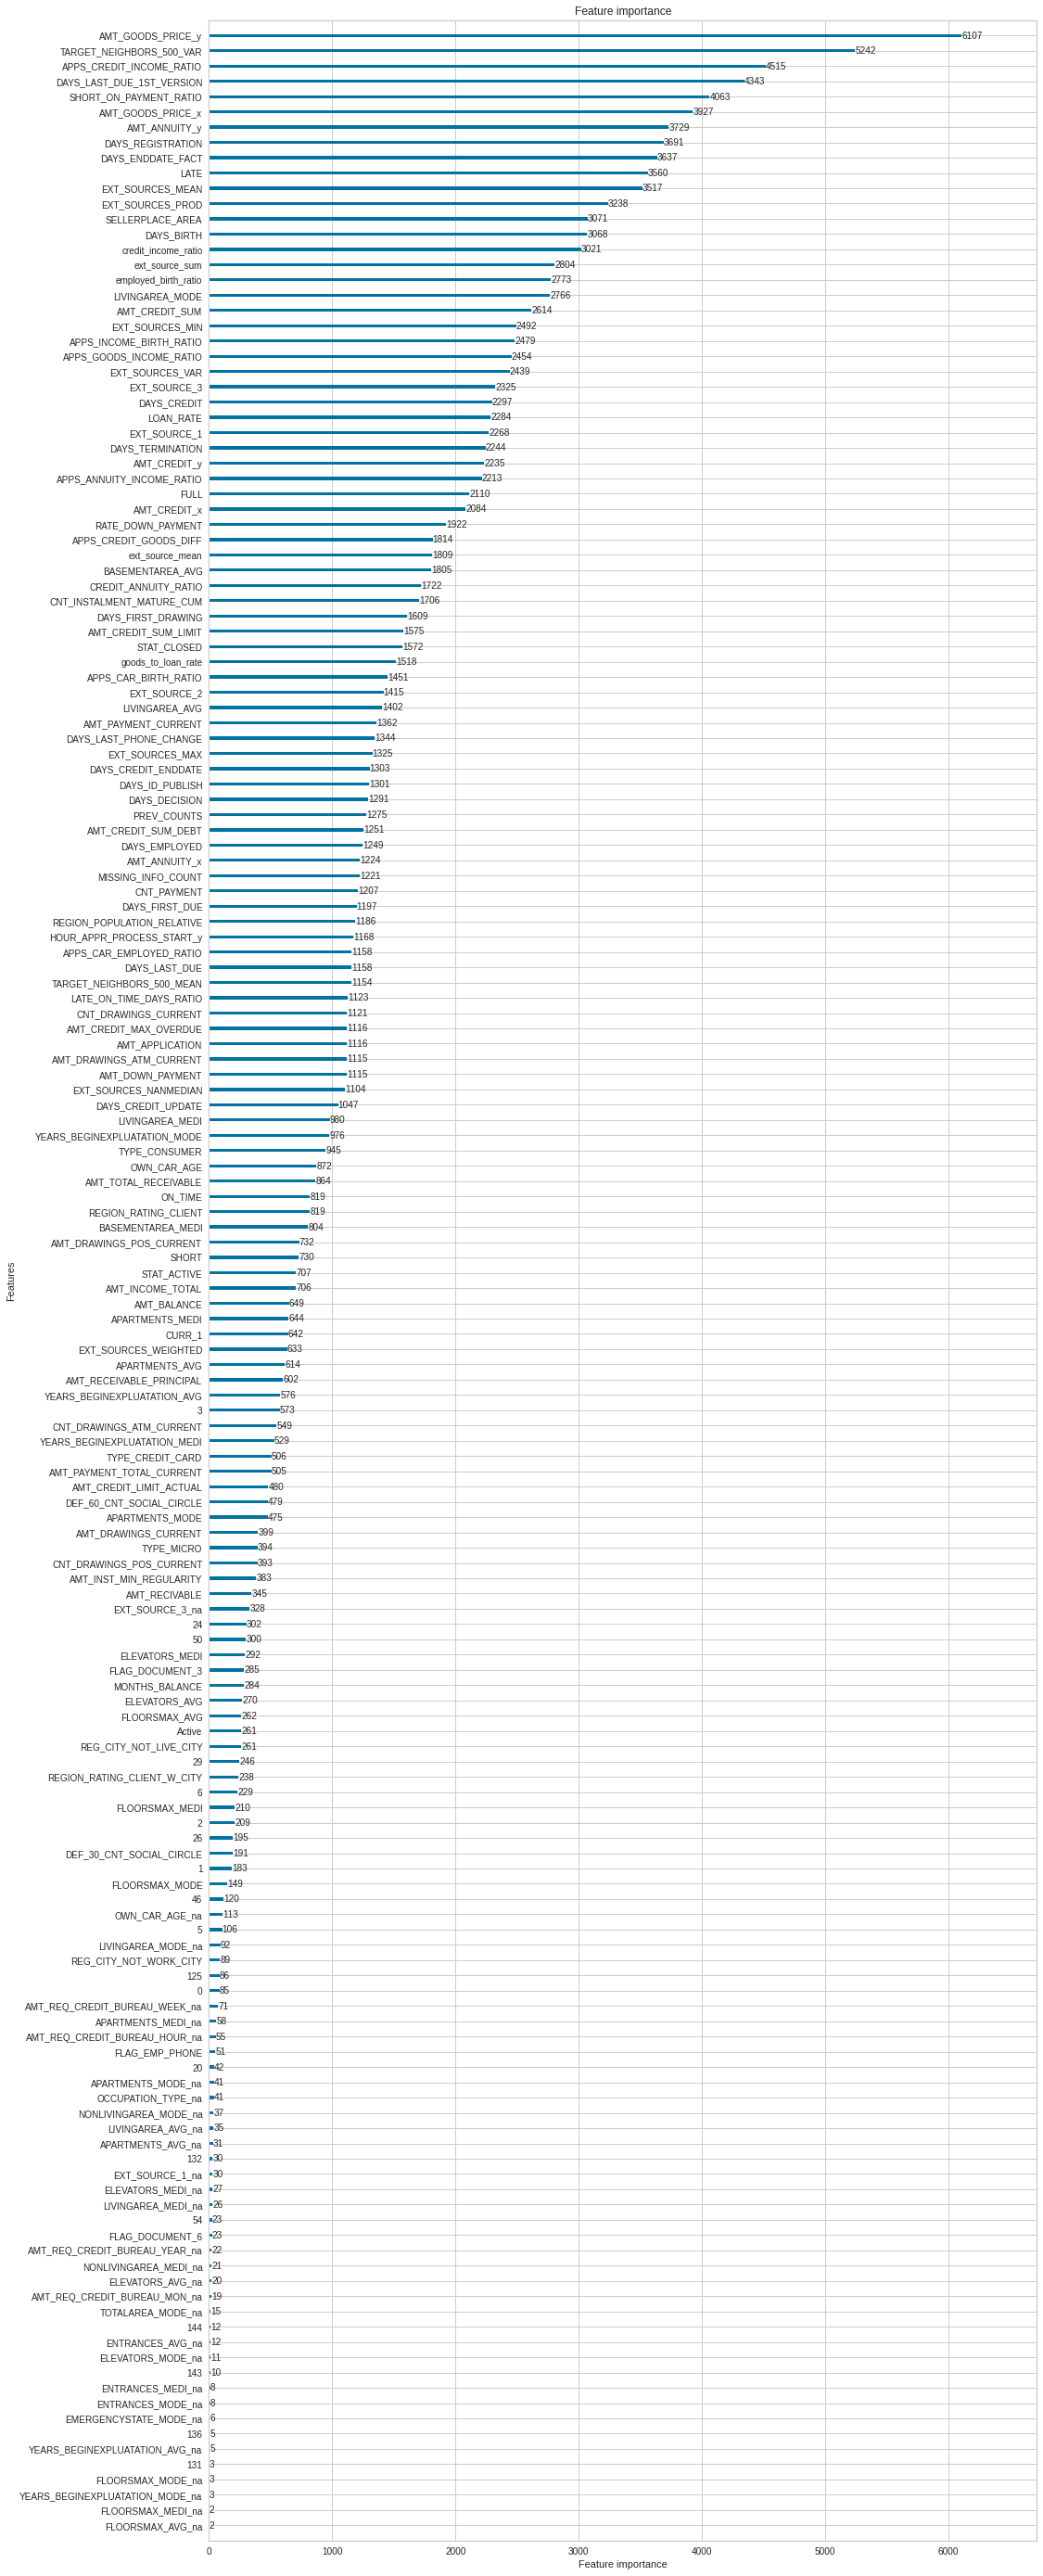

In [ ]:
plot_importance(clf, figsize=(16, 50));

In [ ]:
y_proba = clf.predict(INCLUSIVE_test_boruta)
to_csv(y_proba, "results_25")

       SK_ID_CURR    TARGET
0          100001  0.026412
1          100005  0.124155
2          100013  0.016340
3          100028  0.035039
4          100038  0.104536
...           ...       ...
48739      456221  0.080486
48740      456222  0.077303
48741      456223  0.014444
48742      456224  0.012086
48743      456250  0.234015

[48744 rows x 2 columns]


In [ ]:
print('Private leaderboard score on Kaggle: 0.78098')

Private leaderboard score on Kaggle: 0.78098


### Results

We have used four techniques in total:
- sklearn's `RFE` (Recursive Feature Elimination)
- sklearn's `RFECV` which automatically selects the number of features for us  in contrast to `RFE`
- mlxtend's `SequentialFeatureSelection` that evaluates all possible subsets of features of the size specified 
- boruta's `BorutaPy` which creates shadow features of the original ones which have their values permuted in order to see how the shadow features fare in comparison to the original ones

Out of the four, only `BorutaPy` ran for a reasonable period of time (reasonable here meaning up to 5 hours). While Boruta has helped us to reduce model complexity significantly (from 500+ features to just 164) it is most unfortunate that it did not result in any improvement of the score on the private leaderboard.
